In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.git', '.ipynb_checkpoints', 'hw1.ipynb', 'README.md', 'Reviews.csv']


In [2]:
# The data path of input file
data_path = "./Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

pd_data = pd_data[:10000]

# Problem 1
list_ID = ['','','','','','','','','','']
list_profile = ['','','','','','','','','','']
list_count = [0,0,0,0,0,0,0,0,0,0]
list_mean = [0,0,0,0,0,0,0,0,0,0]

type(pd_data)

top10_ID = pd_data['UserId'].value_counts().head(10)
i=0
for i in range(10):
    list_count[i] = top10_ID[i]
    
    filter = pd_data["UserId"] == top10_ID.index[i] # UserID
    top = pd_data[filter] # 篩選 data frame
    
    list_ID[i] = top10_ID.index[i]
    list_profile[i] = top.iloc[0,3]
    list_mean[i] = round(top['Score'].mean(), 6)
    i=i+1
    
dict = {"UserId": list_ID,  
        "ProfileName": list_profile,
        "Score count": list_count,  
        "Score mean": list_mean
       }

top_df = pd.DataFrame(dict)
print(top_df)

           UserId                                 ProfileName  Score count  \
0  A1Z54EM24Y40LL                                          c2           17   
1  A2SZLNSI5KOQJT  Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
2  A35R32TA60XD57                                    M. Torma            9   
3  A281NPSIMI1C2R      Rebecca of Amazon "The Rebecca Review"            8   
4  A3OXHLG6DIBRW8                            C. F. Hill "CFH"            7   
5  A3NHUQ33CFH3VM                                Citizen John            7   
6  A3PJZ8TU8FDQ1K                                Jared Castle            7   
7   AQQLWCMRNDFGI                          Steven A. Peterson            6   
8  A2R6RA8FRBS608                          Matthew G. Sherwin            6   
9  A10H24TDLK2VDP                         William Jens Jensen            6   

   Score mean  
0    3.882353  
1    3.800000  
2    4.111111  
3    5.000000  
4    4.428571  
5    3.142857  
6    4.714286  
7    4.166667

<BarContainer object of 5 artists>

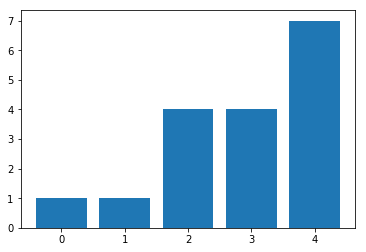

In [3]:
#Problem 2
list_times = [0,0,0,0,0]

filter = pd_data["UserId"] == top10_ID.index[0]
top1 = pd_data[filter]

top1.iloc[3,6]
i = 0
for i in range(len(top1)):
    list_times[int(top1.iloc[i,6])-1] =  list_times[int(top1.iloc[i,6])-1] + 1
    i = i+1
    
x = np.arange(len(list_times))
plt.bar(x,list_times)

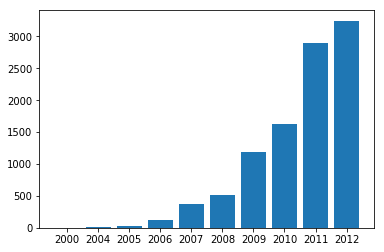

In [4]:
#Problem 3
list_date = []
i=0
for i in range(len(pd_data)):
    list_date.append(pd_data.iloc[i,7])
    i=i+1
type(list_date)
j=0
for j in range(len(list_date)):
    timeArray = time.localtime(list_date[j])
    otherStyleTime = time.strftime("%Y", timeArray)
    list_date[j] = otherStyleTime
    j=j+1
dict_date = {"Date": list_date }
date_df = pd.DataFrame(dict_date)
date_df['Date'].value_counts()
plt.bar(date_df['Date'].value_counts().index[:],date_df['Date'].value_counts()[:])
plt.gca().invert_xaxis()

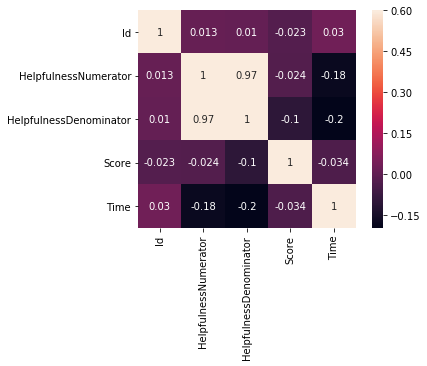

In [5]:
#Problem 4
pd_heatmap = pd_data.drop(['ProductId','UserId','ProfileName','Summary','Text'], axis=1).corr()
foo = sns.heatmap(pd_heatmap, vmax=0.6, square=True, annot=True)

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

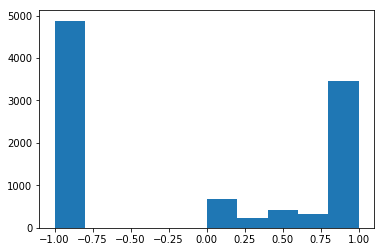

In [6]:
#Problem 5
list_HelpfulRatio = []
i=0
for i in range(len(pd_data)):
    if pd_data.iloc[i,4] <= pd_data.iloc[i,5]:
        if pd_data.iloc[i,4] == 0 and pd_data.iloc[i,5] == 0:
            list_HelpfulRatio.append(-1)
        else:
            list_HelpfulRatio.append(pd_data.iloc[i,4] / pd_data.iloc[i,5])
    i=i+1
plt.hist(list_HelpfulRatio)

In [ ]:
### Part 2 ###